In [1]:
import torch

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [6]:
def sample_from_matrix(data, number):
    number_of_rows = data.shape[0]
    indices = np.random.choice(number_of_rows, number)
    return data[indices, :]

def norm_tsne(data):
    min, max = np.min(data, 0), np.max(data, 0)
    return data / (max-min)

tsne = TSNE(init='pca', random_state=0)

In [3]:
import utils
data, labels = utils.load_data('seed4')

E:\EEG\code\PHD_Project\MSADS\utils.py:461: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data), np.array(label)


In [4]:
source_datas, source_labels = data[0], labels[0]
target_data, target_label = list(source_datas).pop(0), list(source_labels).pop(0)
source_data = source_datas[1:15]
source_label = source_labels[1:15]

## 原始数据T-SNE

In [7]:
# sample 100 data
source_tsne_data = []
for i in range(len(source_data)):
    source_tsne_data.append(sample_from_matrix(source_data[i], 150))
target_tsne_data = sample_from_matrix(target_data, 150)

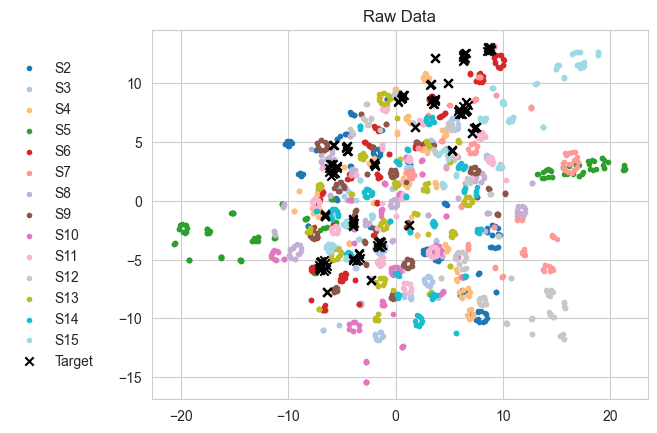

In [15]:
# 绘制源域和目标域数据的t-SNE图
cmap = plt.get_cmap('tab20')  # 使用20色色谱，足够区分14个类别
colors = [cmap(i) for i in np.linspace(0, 1, len(source_data))]
# 绘制源域数据
scatter_handles = []
for i in range(len(source_data)):
    # t-SNE转换和归一化
    trans_data = tsne.fit_transform(source_tsne_data[i])
    # trans_data = norm_tsne(trans_data)

    # 绘制并记录图形对象
    scatter = plt.scatter(trans_data[:,0], trans_data[:,1],
                         marker=".",
                         color=colors[i],  # 指定唯一颜色
                         label=f'S{i+2}')  # S2开始编号
    scatter_handles.append(scatter)

# 绘制目标域数据
trans_t_data = tsne.fit_transform(target_tsne_data)
# trans_t_data = norm_tsne(trans_t_data)
target_scatter = plt.scatter(trans_t_data[:,0], trans_t_data[:,1],
                            marker="x",
                            c='black',
                            label='Target')
# 组合图例元素
legend_elements = scatter_handles + [target_scatter]

# 设置图例和样式
plt.legend(handles=legend_elements,
           labels=[f'S{i}' for i in range(2, 16)] + ['Target'],  # S2-S15
           loc="center left",
           bbox_to_anchor=(-0.3, 0.5),
           frameon=False)
plt.title('Raw Data')
plt.savefig(f'./plot/tsne1.svg', dpi=300, bbox_inches='tight')
plt.savefig(f'./plot/tsne1.pdf', dpi=300, bbox_inches='tight')

In [9]:
s1_model = torch.load('model/msda_plotseed4_cross_subject/model_csub_1/0_BEST.pth')

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
s1_model

ADS_MSDANet(
  (sharedNet): CFE(
    (band_attention): MultiheadAttention(
      (w_q): Linear(in_features=62, out_features=62, bias=True)
      (w_k): Linear(in_features=62, out_features=62, bias=True)
      (w_v): Linear(in_features=62, out_features=62, bias=True)
      (fc): Linear(in_features=62, out_features=62, bias=True)
      (do): Dropout(p=0.1, inplace=False)
    )
    (channel_attention): MultiheadAttention(
      (w_q): Linear(in_features=5, out_features=5, bias=True)
      (w_k): Linear(in_features=5, out_features=5, bias=True)
      (w_v): Linear(in_features=5, out_features=5, bias=True)
      (fc): Linear(in_features=5, out_features=5, bias=True)
      (do): Dropout(p=0.1, inplace=False)
    )
    (module): Sequential(
      (0): Linear(in_features=310, out_features=256, bias=True)
      (1): LeakyReLU(negative_slope=0.01, inplace=True)
      (2): Linear(in_features=256, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01, inplace=True)
      (4): Linea

In [12]:
s1_model.eval()
s1_model.to(device)

ADS_MSDANet(
  (sharedNet): CFE(
    (band_attention): MultiheadAttention(
      (w_q): Linear(in_features=62, out_features=62, bias=True)
      (w_k): Linear(in_features=62, out_features=62, bias=True)
      (w_v): Linear(in_features=62, out_features=62, bias=True)
      (fc): Linear(in_features=62, out_features=62, bias=True)
      (do): Dropout(p=0.1, inplace=False)
    )
    (channel_attention): MultiheadAttention(
      (w_q): Linear(in_features=5, out_features=5, bias=True)
      (w_k): Linear(in_features=5, out_features=5, bias=True)
      (w_v): Linear(in_features=5, out_features=5, bias=True)
      (fc): Linear(in_features=5, out_features=5, bias=True)
      (do): Dropout(p=0.1, inplace=False)
    )
    (module): Sequential(
      (0): Linear(in_features=310, out_features=256, bias=True)
      (1): LeakyReLU(negative_slope=0.01, inplace=True)
      (2): Linear(in_features=256, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01, inplace=True)
      (4): Linea

## 归一化之后的tSNE

In [13]:
# sample 150 data
source_tsne_data = []
for i in range(len(source_data)):
    source_tsne_data.append(sample_from_matrix(source_data[i], 150))
target_tsne_data = sample_from_matrix(target_data, 150)
for i in range(len(source_data)):
    source_data[i] = utils.norminy(source_data[i])
target_data = utils.norminy(target_data)

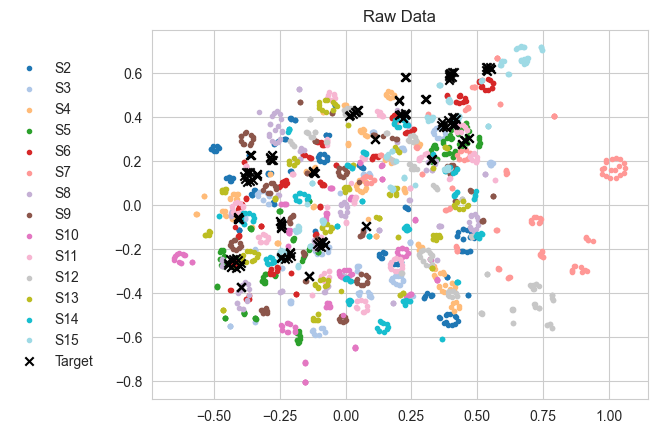

In [14]:
# 绘制源域和目标域数据的t-SNE图
cmap = plt.get_cmap('tab20')  # 使用20色色谱，足够区分14个类别
colors = [cmap(i) for i in np.linspace(0, 1, len(source_data))]
# 绘制源域数据
scatter_handles = []
for i in range(len(source_data)):
    # t-SNE转换和归一化
    trans_data = tsne.fit_transform(source_tsne_data[i])
    trans_data = norm_tsne(trans_data)

    # 绘制并记录图形对象
    scatter = plt.scatter(trans_data[:,0], trans_data[:,1],
                         marker=".",
                         color=colors[i],  # 指定唯一颜色
                         label=f'S{i+2}')  # S2开始编号
    scatter_handles.append(scatter)

# 绘制目标域数据
trans_t_data = tsne.fit_transform(target_tsne_data)
trans_t_data = norm_tsne(trans_t_data)
target_scatter = plt.scatter(trans_t_data[:,0], trans_t_data[:,1],
                            marker="x",
                            c='black',
                            label='Target')
# 组合图例元素
legend_elements = scatter_handles + [target_scatter]

# 设置图例和样式
plt.legend(handles=legend_elements,
           labels=[f'S{i}' for i in range(2, 16)] + ['Target'],  # S2-S15
           loc="center left",
           bbox_to_anchor=(-0.3, 0.5),
           frameon=False)

plt.title('Raw Data')
plt.savefig('./plot/tsne_raw_no_legend.svg', dpi=300, bbox_inches='tight')
plt.savefig('./plot/tsne_raw_no_legend.pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()
# for i in range(len(source_data)):
#     trans_data = tsne.fit_transform(source_tsne_data[i])
#     trans_data = norm_tsne(trans_data)
#     plt.scatter(trans_data[:,0], trans_data[:,1], marker=".")
# trans_t_data = tsne.fit_transform(target_tsne_data)
# trans_t_data = norm_tsne(trans_t_data)
# plt.scatter(trans_t_data[:,0], trans_t_data[:,1], marker="x", c='black')
# plt.legend(['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'Target'],loc="center left" ,bbox_to_anchor=(-0.3, 0.5), frameon=False)
# plt.title('Raw Data')
# plt.savefig(f'./plot/tsne_raw_no_legend.svg', dpi=300, bbox_inches='tight')
# plt.savefig(f'./plot/tsne_raw_no_legend.pdf', dpi=300, bbox_inches='tight')

## 模型输出的tSNE

In [27]:
tsne_source_loaders = []
for i in range(len(source_data)):
    tsne_source_loaders.append(torch.utils.data.DataLoader(dataset=utils.CustomDataset(source_data[i], source_label[i]), batch_size=len(source_data[i]), shuffle=True, drop_last=True))
tsne_target_loader = torch.utils.data.DataLoader(dataset=utils.CustomDataset(target_data, target_label), batch_size=len(target_data), shuffle=True, drop_last=True)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
# AC-MSDA 目标域数据输入模型进行测试
import torch.nn.functional as F
test_label = []
pred_label = []
for data, label in tsne_target_loader:
    data = data.to(device)
    labels = label.to(device)
    preds, data_CFE_tgt, features_tsne_target = s1_model(data, 14)
    # features_tsne_target_tmp = sum(features_tsne_target) / len(features_tsne_target)
#     for ti in range(len(preds)):
#         preds[ti] = F.softmax(preds[ti], dim=1)
#     pred = sum(preds) / len(preds)
#     test_loss = F.nll_loss(F.log_softmax(pred, dim=1), label.squeeze()).item()
#     print(f"Test Loss: {test_loss:.4f}")
#     pred = pred.data.max(1)[1]
#     test_label.append(label.data.squeeze().cpu())
#     pred_label.append(pred.cpu())
# confusion = confusion_matrix(torch.hstack(test_label), torch.hstack(pred_label))
# acc_score = accuracy_score(torch.hstack(test_label), torch.hstack(pred_label))
#     # _, features_tsne_target = s1_model(data, 14)
# print(f"Accuracy: {acc_score:.4f}")
# print(f"Confusion Matrix:\n{confusion}")

In [43]:
sources_features = [] # 14x14x820x32
source_cfe_features = [] # 14x14x820x64
for i in range(len(tsne_source_loaders)):
    for data, label in tsne_source_loaders[i]:
        data = data.to(device)
        label = label.to(device)
        _, data_CFE_tmp, features_tsne_source_tmp = s1_model(data, len(tsne_source_loaders))
        # features_tsne_source_tmp = sum(features_tsne_source_tmp) / len(features_tsne_source_tmp)
        sources_features.append(features_tsne_source_tmp)
        source_cfe_features.append(data_CFE_tmp)

(14, 14)

In [44]:
source_cfe_features[1].shape, sources_features[0][0].shape

(torch.Size([851, 64]), torch.Size([851, 32]))

In [45]:
features_tsne_source = []
cfe_tsne_source = []
for i in range(len(sources_features)):
    features_tsne_source.append(sources_features[i][i])
    cfe_tsne_source.append(source_cfe_features[i])

In [36]:
source_after_tsne_data = []
cfe_feature_after_tsne = []
for i in range(len(features_tsne_source)):
    source_after_tsne_data.append(sample_from_matrix(features_tsne_source[i], 150))
    cfe_feature_after_tsne.append(sample_from_matrix(cfe_tsne_source[i], 150))

In [50]:
# ms-mdaer
target_after_tsne_data = sample_from_matrix(data_CFE_tgt, 150)
target_after_tsne_data2 = []
# features_tsne_target_tmp
for i in range(len(features_tsne_source)):
    target_after_tsne_data2.append(sample_from_matrix(features_tsne_target[i], 150))

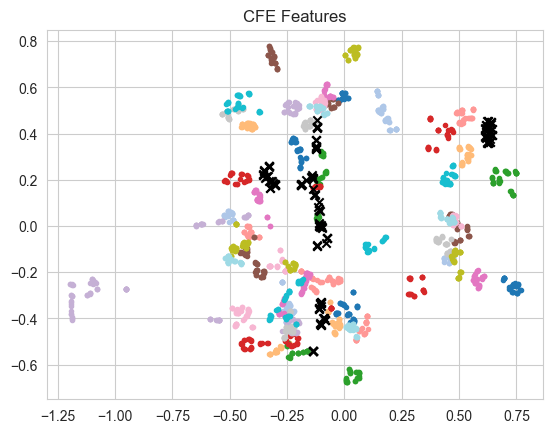

In [46]:
# 绘制源域和目标域数据的t-SNE图
cmap = plt.get_cmap('tab20')  # 使用20色色谱，足够区分14个类别
colors = [cmap(i) for i in np.linspace(0, 1, len(source_data))]
# 绘制源域数据
scatter_handles = []
for i in range(len(cfe_feature_after_tsne)):
    # t-SNE转换和归一化
    trans_data = tsne.fit_transform(cfe_feature_after_tsne[i].cpu().data.numpy())
    trans_data = norm_tsne(trans_data)

    # 绘制并记录图形对象
    scatter = plt.scatter(trans_data[:,0], trans_data[:,1],
                         marker=".",
                         color=colors[i],  # 指定唯一颜色
                         label=f'S{i+2}')  # S2开始编号
    scatter_handles.append(scatter)

# 绘制目标域数据
trans_t_data = tsne.fit_transform(target_after_tsne_data.cpu().data.numpy())
trans_t_data = norm_tsne(trans_t_data)
target_scatter = plt.scatter(trans_t_data[:,0], trans_t_data[:,1],
                            marker="x",
                            c='black',
                            label='Target')
# 组合图例元素
legend_elements = scatter_handles + [target_scatter]

# 设置图例和样式
# plt.legend(handles=legend_elements,
#            labels=[f'S{i}' for i in range(2, 16)] + ['Target'],  # S2-S15
#            loc="center left",
#            bbox_to_anchor=(-0.3, 0.5),
#            frameon=False)
plt.title('CFE Features')
plt.savefig(f'./plot/tsne_CFE2.svg', dpi=300, bbox_inches='tight')
plt.savefig(f'./plot/tsne_CFE2.pdf', dpi=300, bbox_inches='tight')
# for i in range(len(cfe_feature_after_tsne)):
#     trans_data = tsne.fit_transform(cfe_feature_after_tsne[i].cpu().data.numpy())
#     trans_data = norm_tsne(trans_data)
#     plt.scatter(trans_data[:,0], trans_data[:,1], marker=".")
# trans_t_data = tsne.fit_transform(target_after_tsne_data.cpu().data.numpy())
# trans_t_data = norm_tsne(trans_t_data)
# plt.scatter(trans_t_data[:,0], trans_t_data[:,1], marker="x", c='black', alpha=0.2)
# plt.title('CFE Features')
# plt.savefig(f'./plot/tsne_CFE.svg', dpi=300, bbox_inches='tight')
# plt.savefig(f'./plot/tsne_CFE.pdf', dpi=300, bbox_inches='tight')

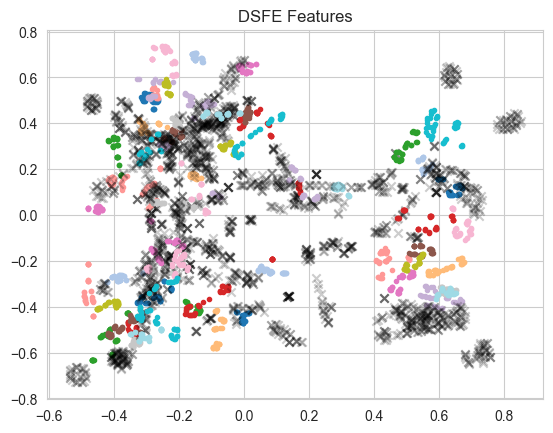

In [52]:
cmap = plt.get_cmap('tab20')  # 使用20色色谱，足够区分14个类别
colors = [cmap(i) for i in np.linspace(0, 1, len(source_data))]
# 绘制源域数据
scatter_handles = []
for i in range(len(source_after_tsne_data)):
    # t-SNE转换和归一化
    trans_data = tsne.fit_transform(source_after_tsne_data[i].cpu().data.numpy())
    trans_data = norm_tsne(trans_data)

    # 绘制并记录图形对象
    scatter = plt.scatter(trans_data[:,0], trans_data[:,1],
                         marker=".",
                         color=colors[i],  # 指定唯一颜色
                         label=f'S{i+2}')  # S2开始编号
    scatter_handles.append(scatter)

    # 绘制目标域数据
    trans_t_data = tsne.fit_transform(target_after_tsne_data2[i].cpu().data.numpy())
    trans_t_data = norm_tsne(trans_t_data)
    target_scatter = plt.scatter(trans_t_data[:,0], trans_t_data[:,1],
                                marker="x",
                                c='black',
                                label='Target', alpha=0.2)
# 组合图例元素
legend_elements = scatter_handles + [target_scatter]

# for i in range(len(source_after_tsne_data)):
#     trans_data = tsne.fit_transform(source_after_tsne_data[i].cpu().data.numpy())
#     trans_data = norm_tsne(trans_data)
#     plt.scatter(trans_data[:,0], trans_data[:,1], marker=".")
#     trans_t_data = tsne.fit_transform(target_after_tsne_data[i].cpu().data.numpy())
#     trans_t_data = norm_tsne(trans_t_data)
#     plt.scatter(trans_t_data[:,0], trans_t_data[:,1], marker="x", c='black', alpha=0.2)
# plt.legend(['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'Target'],loc="center right" ,bbox_to_anchor=(1.2, 0.5), frameon=False)
plt.title('DSFE Features')
plt.savefig(f'./plot/tsne_DSFE2.svg', dpi=300, bbox_inches='tight')
plt.savefig(f'./plot/tsne_DSFE2.pdf', dpi=300, bbox_inches='tight')

In [58]:
len(target_after_tsne_data)

14